# Customer Churn

---

## Contents

- <a href="#import">Import Libraries</a><br>
- <a href="#data">Import Data</a><br>
- <a href="#3">Creating 3-way Holdout data sets</a><br>
- <a href="#eda">Exploratory Data Analysis</a><br>
- <a href="#prep">Data Preprocessing</a><br>
- <a href="#sel">Feature Selection</a><br>
- <a href="#engg">Feature Engineering</a><br>

---

<p><a name="import"></a></p>
 
### Import Modules

In [86]:
# Standard Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Compose
from sklearn.compose import make_column_transformer

# Classes for inheritance
from sklearn.base import BaseEstimator, TransformerMixin

# Pipeline
from sklearn.pipeline import make_pipeline

# ML Models
from sklearn.linear_model import LogisticRegression

# Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

---

<p><a name="data"></a></p>

### Import Data

In [2]:
# Read csv

churn_data = pd.read_csv('./data/churn_data.csv')

In [3]:
churn_data.shape

(3333, 21)

---

<p><a name="3"></a></p>

### Creating a 3-way holdout dataset
- Training & Validation data 
- Test (Unseen) data

In [4]:
X_tmp = churn_data.drop(['Churn'], axis=1)
y_tmp = churn_data['Churn']

print('Shape of X and y:\n')
print(X_tmp.shape, y_tmp.shape)

Shape of X and y:

(3333, 20) (3333,)


In [5]:
# Split data into training - validation and test (unseen) data

X_train_val, X_unseen, y_train_val, y_unseen = train_test_split(X_tmp, y_tmp, test_size=0.2)

In [6]:
print('Shape of training & validation data:')
print(X_train_val.shape, y_train_val.shape)
print('\n','-'*40)
print('\nShape of test(unseen) data:')
print(X_unseen.shape, y_unseen.shape)

Shape of training & validation data:
(2666, 20) (2666,)

 ----------------------------------------

Shape of test(unseen) data:
(667, 20) (667,)


In [7]:
# Making a working copy of the training and validation data

df = X_train_val.copy()

In [8]:
# Adding churned feature back into dataset to understand properties
# of churned v/s non-churned customers

df['Churn'] = y_train_val

**df = X_train_val + y_train_val**

In [9]:
df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,...,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone,Churn
1349,71,22,141.4,163.0,220.0,5.6,2,no,yes,107,...,105,13.86,99,9.90,3,1.51,KY,510,403-1953,no
2552,49,0,236.6,220.9,146.8,8.9,1,no,no,91,...,146,18.78,114,6.61,2,2.40,MT,408,353-8970,no
322,104,0,138.7,256.9,234.9,10.0,0,no,no,107,...,113,21.84,74,10.57,3,2.70,VA,408,360-2479,no
2471,95,23,160.3,202.4,191.1,7.4,0,no,yes,87,...,101,17.20,122,8.60,3,2.00,OH,415,329-8056,no
1350,55,0,285.7,230.9,230.7,14.8,0,no,no,124,...,106,19.63,140,10.38,7,4.00,WA,408,357-6039,yes


---

<p><a name="eda"></a></p>

### Exploratory Analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 1349 to 504
Data columns (total 21 columns):
Account_Length    2666 non-null int64
Vmail_Message     2666 non-null int64
Day_Mins          2666 non-null float64
Eve_Mins          2666 non-null float64
Night_Mins        2666 non-null float64
Intl_Mins         2666 non-null float64
CustServ_Calls    2666 non-null int64
Intl_Plan         2666 non-null object
Vmail_Plan        2666 non-null object
Day_Calls         2666 non-null int64
Day_Charge        2666 non-null float64
Eve_Calls         2666 non-null int64
Eve_Charge        2666 non-null float64
Night_Calls       2666 non-null int64
Night_Charge      2666 non-null float64
Intl_Calls        2666 non-null int64
Intl_Charge       2666 non-null float64
State             2666 non-null object
Area_Code         2666 non-null int64
Phone             2666 non-null object
Churn             2666 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 458.2+ KB


In [11]:
sns.set()

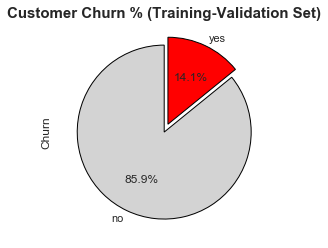

In [12]:
# Customer Churn as a % 

df['Churn'].value_counts().plot(kind='pie'
                                ,colors=['lightgrey','red']
                                ,wedgeprops={'edgecolor': 'black'}
                                ,explode=[0,0.1]
                                ,autopct='%1.1f%%'
                                ,startangle=90)
plt.title('Customer Churn % (Training-Validation Set)', size=15, fontweight='bold')
plt.show()

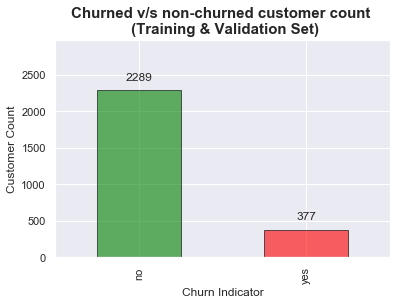

In [13]:
# Number of churned customers

color = ['green', 'red']

df['Churn'].value_counts().plot(kind='bar', alpha=0.6, color=color, edgecolor='black')

plt.title('Churned v/s non-churned customer count \n (Training & Validation Set)', size=15, fontweight='bold')
plt.ylabel('Customer Count')
plt.xlabel('Churn Indicator')

plt.margins(0.3)

for x,y in enumerate(df['Churn'].value_counts()):

    label = "{:.0f}".format(y)

    plt.annotate(label
                 ,(x,y)
                 ,textcoords="offset points"
                 ,xytext=(0,10)
                 ,ha='center'
                ) 
plt.show()

In [14]:
df.groupby('Churn')[['CustServ_Calls', 'Vmail_Message']].mean()

,CustServ_Calls,Vmail_Message
Churn,,
no,1.420708,8.671035
yes,2.236074,5.111406


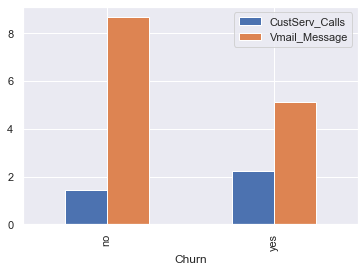

In [15]:
# Analyzing churned v/s non-churned customer differences

df.groupby('Churn')[['CustServ_Calls', 'Vmail_Message']].mean().plot(kind='bar')

In [16]:
df.groupby('Churn')[['CustServ_Calls', 'Vmail_Message']].std()

,CustServ_Calls,Vmail_Message
Churn,,
no,1.159835,13.954523
yes,1.856551,11.760613


In [17]:
# TO DO - make it mardown 




# Insights
    # It can be seen above that Churners place more customer 
    # service calls than non-churners, and leave fewer voice
    # mail messages.

In [18]:
# Veiwing churners and non-churners by state

df.groupby('State')['Churn'].value_counts()[['AL','CA','CO']]

State  Churn
AL     no       59
       yes       7
CA     no       21
       yes       6
CO     no       44
       yes       7
Name: Churn, dtype: int64

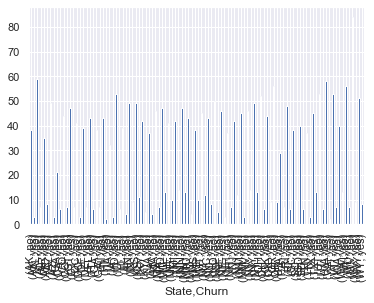

In [19]:
# TO DO - multiple bar to see churn and non-churn across different states





df.groupby('State')['Churn'].value_counts().plot(kind='bar')

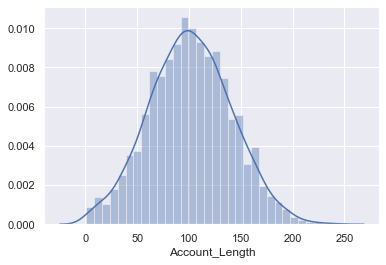

In [20]:
# Distribution of "Account_Length" feature

# plt.hist(df['Account_Length'], bins=25)
sns.distplot(df['Account_Length'])
plt.show()

In [21]:
# Insights
    # Illustrates the duration that a customer stays with the provider
    # is normally distribution (as what to expect in the real world)

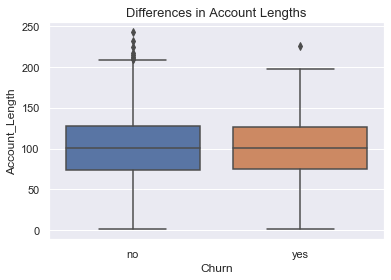

In [22]:
# Examining differences between churners and non-churners
# w.r.t their account lengths

sns.boxplot(x='Churn', 
            y='Account_Length', 
            data=df)

plt.title('Differences in Account Lengths', size=13)
plt.show()

In [23]:
# There are no notable differences in account lengths for
# churners v/s non-churners

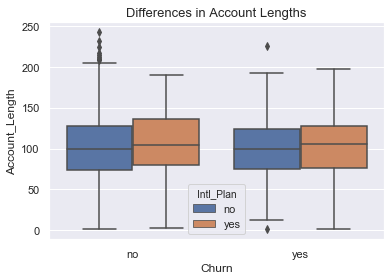

In [24]:
# Checking if having an international plan matters

sns.boxplot(x='Churn', 
            y='Account_Length', 
            data=df,
            hue='Intl_Plan')

plt.title('Differences in Account Lengths', size=13)
plt.show()

In [25]:
# Insights
    # No noticeable difference amoung customers with or
    # without an international plan

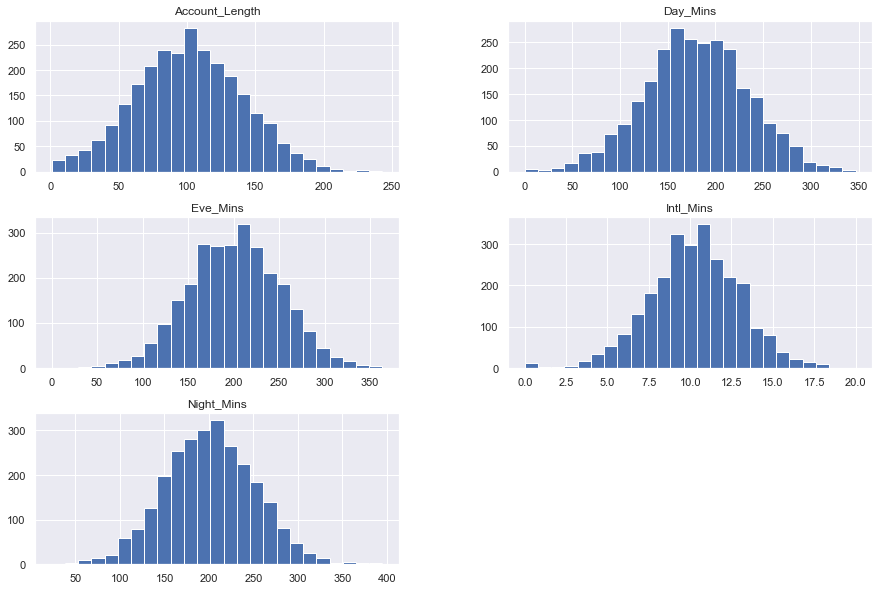

In [26]:
# Checking distribution of select features

df[['Account_Length', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins']].hist(bins=25, figsize=(15,10))
plt.show()

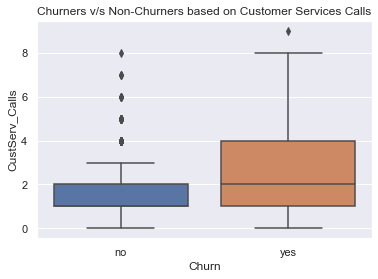

In [27]:
# Churn difference based on Customer Service Calls placed

sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = df)

plt.title('Churners v/s Non-Churners based on Customer Services Calls')
plt.show()

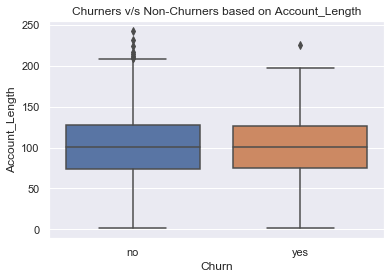

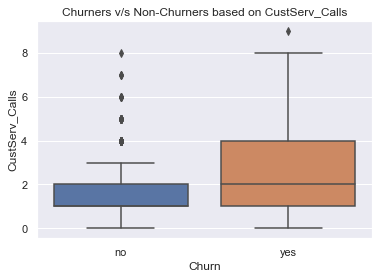

In [28]:
features = ['Account_Length', 'CustServ_Calls'] 

for feature in features:
    fig, axs = plt.subplots()
    fig = sns.boxplot(x = 'Churn',
                      y = feature,
                      data = df)
    plt.title('Churners v/s Non-Churners based on {}'.format(feature))

plt.show()

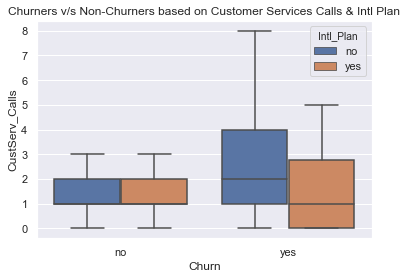

In [29]:
# Churn difference based on Customer Service Calls placed
# and being on an International Plan

sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = df,
            sym='', # removing outliers from plot
            hue='Intl_Plan') 

plt.title('Churners v/s Non-Churners based on Customer Services Calls & Intl Plan')
plt.show()

In [30]:
# Insights:
    # Customers who leave more customer service calls churn more
    # unless they also have an international plan

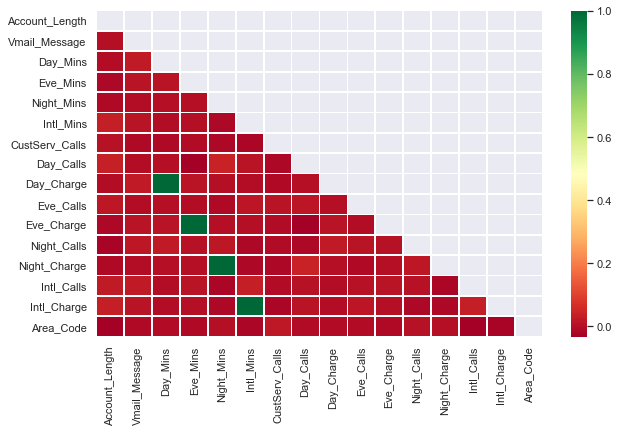

In [31]:
plt.figure(figsize=(10,6))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(df.corr(), mask= mask, linewidth=0.7, cmap='RdYlGn') 
plt.show()

In [32]:
# Since charges and mins are strongly correlated, we can either remove
# one of them, or feature engineer them to create 4 new charges_min
# and drop the charges and min columns subsequently.

---

<p><a name="prep"></a></p>

## Data Preprocessing

- Check missing values
- Checking distribution of features
- Encoding Categorical variables
- Feature Scaling via Standardization
- Feature Selection and Engineering

### Missing Values

In [33]:
# Missing values check

missing = df.isnull().sum()
missing[missing > 0]

Series([], dtype: int64)

In [34]:
# Examining data types 

df.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Intl_Plan          object
Vmail_Plan         object
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
Churn              object
dtype: object

In [35]:
# Forming list of columns that are numerical and categorical

features_num = X_train_val.select_dtypes(include=['int64', 'float64']).columns
features_cat = X_train_val.select_dtypes(include=['object']).columns

In [36]:
print(features_num)
print('-'*80)
print(features_cat)

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Day_Calls', 'Day_Charge', 'Eve_Calls',
       'Eve_Charge', 'Night_Calls', 'Night_Charge', 'Intl_Calls',
       'Intl_Charge', 'Area_Code'],
      dtype='object')
--------------------------------------------------------------------------------
Index(['Intl_Plan', 'Vmail_Plan', 'State', 'Phone'], dtype='object')


In [37]:
X_train_val[features_num]

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
1349,71,22,141.4,163.0,220.0,5.6,2,107,24.04,105,13.86,99,9.90,3,1.51,510
2552,49,0,236.6,220.9,146.8,8.9,1,91,40.22,146,18.78,114,6.61,2,2.40,408
322,104,0,138.7,256.9,234.9,10.0,0,107,23.58,113,21.84,74,10.57,3,2.70,408
2471,95,23,160.3,202.4,191.1,7.4,0,87,27.25,101,17.20,122,8.60,3,2.00,415
1350,55,0,285.7,230.9,230.7,14.8,0,124,48.57,106,19.63,140,10.38,7,4.00,408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102,111,0,246.5,216.3,179.6,12.7,2,108,41.91,89,18.39,99,8.08,3,3.43,415
2310,148,25,230.7,233.8,215.8,13.5,3,102,39.22,109,19.87,90,9.71,2,3.65,408
1361,64,0,206.2,232.4,251.6,13.6,1,76,35.05,76,19.75,96,11.32,2,3.67,415
2654,66,0,207.7,196.7,261.7,6.8,1,85,35.31,112,16.72,83,11.78,3,1.84,510


In [38]:
X_train_val[features_cat]

,Intl_Plan,Vmail_Plan,State,Phone
1349,no,yes,KY,403-1953
2552,no,no,MT,353-8970
322,no,no,VA,360-2479
2471,no,yes,OH,329-8056
1350,no,no,WA,357-6039
...,...,...,...,...
2102,no,no,WI,382-6438
2310,no,yes,IL,395-9270
1361,no,no,WY,385-1985
2654,no,no,ME,404-3592


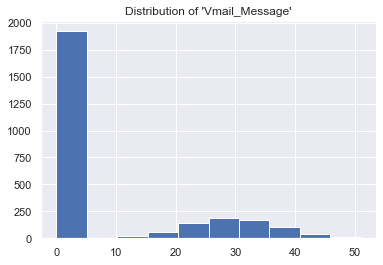

In [39]:
# Examining feature: 'Vmail_Message'

plt.hist(X_train_val['Vmail_Message'])

plt.title('Distribution of \'Vmail_Message\'')
plt.show()

**Insights**
- Since this feature has 0 as the most frequent value for most observations, I'll make this a candidate for a binary column (to be done in feature engineering)

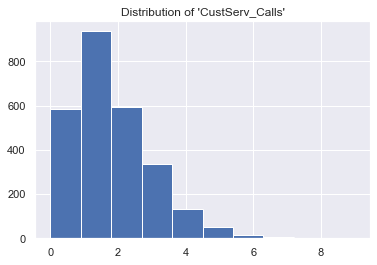

In [40]:
plt.hist(X_train_val['CustServ_Calls'])

plt.title('Distribution of \'CustServ_Calls\'')
plt.show()

### Encoding Target

In [41]:
# Instantiate Label Encoder for "Churn"

le = LabelEncoder()

In [42]:
y_train_val = le.fit_transform(y_train_val)

In [43]:
y_train_val

array([0, 0, 0, ..., 0, 0, 0])

### Train-Test Split

In [44]:
# Split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X_train_val, y_train_val, test_size=0.25)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1999, 20) (667, 20) (1999,) (667,)


---

<p><a name="sel"></a></p>

### Feature Selection

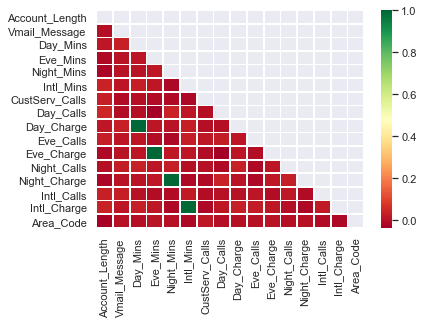

In [45]:
mask = np.zeros_like(X_train.corr())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(X_train.corr(), mask= mask, linewidth=0.7, cmap='RdYlGn') 
plt.show()

**Insights:**
- Following features are highly correlated
    - Day_Mins & Day_Charge
    - Eve_Mins & Eve_Charge
    - Night_Mins & Night_Charge
    - Intl_Mins & Intl_Charge
- Either set are candidates for being dropped or their combination for feature engineering

---

<p><a name="engg"></a></p>

### Feature Engineering

In [46]:
class CategoricalTransformer(BaseEstimator, TransformerMixin):
    
    '''
    Descr:
    This class contains methods to undertake categorical transformations
    on features and its output will be used as CustomTransfomers 
    in the pipeline functionality to prevent data leakage and also
    automate categorical transformations on unseen data.
    
    Tasks performed by transform() method:
    1. Drops columns not required / provide no predictive information the model

    I/P:
    Features dataframe

    O/P:
    numpy array of transformed categorical features
    '''    
    
    # Class constructor
    def __init__(self):
        pass
    
    # fit method - does nothing and returns self
    def fit(self, X, y=None):
        return self
    
    # transform method for custom transformations
    def transform(self, X, y=None):
        
        # Doing this to avoid Chained Indexing error:
        # "SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame"
        X1 = X.copy()
        
        # Dropping columns that:
            # were transformed above
            # provide no predictive information
        X1.drop(['Phone'], axis=1, inplace=True)


        # Return numpy array of transformed numerical features
        return X1 

In [47]:
class NumericalTransformer(BaseEstimator, TransformerMixin):
    
    '''
    Descr:
    This class contains methods to undertake numerical transformations
    on features and its output will be used as CustomTransfomers 
    in the pipeline functionality to prevent data leakage and also
    automate numerical transformations on unseen data.
    For it to qualify as a transformer, it will contain the .fit()
    and .transform() methods and we'll be inheriting from 2 classes
    that faciliate this class being a transformer.
    
    Tasks performed by transform() method:
    1. Creates 4 (Day, Eve, Night, Intl) "ChargesPerMin" columns and drops original
    2. Create binary column of features that are highly skewed to 1 value
    3. Drops columns not required / provide no predictive information the model

    I/P:
    Features dataframe

    O/P:
    numpy array of transformed numerical features
    '''    
    
    # Class constructor
    def __init__(self, numerical_features):
        self.numerical_features = numerical_features
    
    # fit method - does nothing and returns self
    def fit(self, X, y=None):
        return self
    
    # Binarize method
    def binarize(self, obj):
        if obj == 0:
            return 0
        else:
            return 1
    
    # transform method for custom transformations
    def transform(self, X, y=None):
        
        X = pd.DataFrame(X, columns=self.numerical_features)
        
        # Doing this to avoid Chained Indexing error:
        # "SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame"
        X1 = X.copy()
        
        # Binarize columns
        X1.loc[:,'Vmail_Message_b'] = X1['Vmail_Message'].apply(self.binarize)

        
        # Dropping columns that:
        X1.drop(['Day_Mins','Eve_Mins','Night_Mins','Intl_Mins',\
                 'Vmail_Message','Area_Code'], axis=1, inplace=True)

        
        # Return numpy array of transformed numerical features
        return X1    #X1.values

In [48]:
# Instantiate Transformers

# Categorical 
cat_transformer = CategoricalTransformer()
imp_mode_c = SimpleImputer(strategy='most_frequent')
oe = OrdinalEncoder()
ohe = OneHotEncoder()

# Numerical
imp_median_n = SimpleImputer(strategy='median')
num_transformer = NumericalTransformer(features_num)
ss = StandardScaler()

In [49]:
# Tagging features for transformations

# Categorical 
features_for_pipe_cat_imp_oe = ['Intl_Plan', 'Vmail_Plan', 'Phone']
    # 'Phone' will get dropped and remaining 2 will be ordinal encoded
features_for_ohe = ['State']

# Numerical
features_for_pipe_num_imp_ss = features_num

In [50]:
# Categorical pipelines
# Pipeline for dropping 'Phone' and for imputation & Ordinal encoding
pipe_cat_imp_oe = make_pipeline(cat_transformer, imp_mode_c, oe)

# Pipeline for imputation & OneHot encoding
pipe_imp_ohe = make_pipeline(imp_mode_c, ohe)


# Numerical pipelines
pipe_num_imp_ss = make_pipeline(imp_median_n, num_transformer,ss)

In [51]:
# Utilizing Column Transformer for transformations

ct = make_column_transformer(
    (pipe_cat_imp_oe, features_for_pipe_cat_imp_oe)
    ,(pipe_imp_ohe, features_for_ohe)
    ,(pipe_num_imp_ss, features_for_pipe_num_imp_ss)
    ,remainder='passthrough') 

In [52]:
ct.fit_transform(X_train)

<1999x64 sparse matrix of type '<class 'numpy.float64'>'
	with 24734 stored elements in Compressed Sparse Row format>

In [53]:
ct.fit_transform(X_train).toarray().shape

(1999, 64)

In [54]:
# Instantiate ML Model

logreg = LogisticRegression()

In [55]:
# Make pipeline of all transformation and Logistic model

pipe = make_pipeline(ct, logreg)

In [56]:
pipe.named_steps

{'columntransformer': ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                   transformer_weights=None,
                   transformers=[('pipeline-1',
                                  Pipeline(memory=None,
                                           steps=[('categoricaltransformer',
                                                   CategoricalTransformer()),
                                                  ('simpleimputer',
                                                   SimpleImputer(add_indicator=False,
                                                                 copy=True,
                                                                 fill_value=None,
                                                                 missing_values=nan,
                                                                 strategy='most_frequent',
                                                                 verbose=0)),
                              

In [57]:
pipe.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline-1',
                                                  Pipeline(memory=None,
                                                           steps=[('categoricaltransformer',
                                                                   CategoricalTransformer()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                  

In [58]:
y_pred = pipe.predict(X_test)

In [59]:
confusion_matrix(y_test, y_pred)

array([[561,  14],
       [ 70,  22]])

In [60]:
(546+30)/(546+30+8+83)

0.863568215892054

In [61]:
params = {}
params['logisticregression__C'] = [0.1, 1, 10, 100]
params['logisticregression__solver'] = ['lbfgs', 'liblinear']
params['logisticregression__max_iter'] = [100,1000,10000]
params

{'logisticregression__C': [0.1, 1, 10, 100],
 'logisticregression__solver': ['lbfgs', 'liblinear'],
 'logisticregression__max_iter': [100, 1000, 10000]}

In [62]:
grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train);

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

In [63]:
pd.DataFrame(grid.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__max_iter,param_logisticregression__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.018719,0.000541,0.006881,0.000197,0.1,100,liblinear,"{'logisticregression__C': 0.1, 'logisticregres...",0.8400,0.8625,0.8775,0.8625,0.859649,0.860430,0.011986,1
3,0.018867,0.000418,0.007039,0.000408,0.1,1000,liblinear,"{'logisticregression__C': 0.1, 'logisticregres...",0.8400,0.8625,0.8775,0.8625,0.859649,0.860430,0.011986,1
5,0.019923,0.001136,0.007596,0.000774,0.1,10000,liblinear,"{'logisticregression__C': 0.1, 'logisticregres...",0.8400,0.8625,0.8775,0.8625,0.859649,0.860430,0.011986,1
0,0.029931,0.004787,0.008233,0.001180,0.1,100,lbfgs,"{'logisticregression__C': 0.1, 'logisticregres...",0.8375,0.8625,0.8775,0.8625,0.859649,0.859930,0.012849,4
2,0.023543,0.000356,0.006869,0.000138,0.1,1000,lbfgs,"{'logisticregression__C': 0.1, 'logisticregres...",0.8375,0.8625,0.8775,0.8625,0.859649,0.859930,0.012849,4
4,0.023169,0.000112,0.007152,0.000613,0.1,10000,lbfgs,"{'logisticregression__C': 0.1, 'logisticregres...",0.8375,0.8625,0.8775,0.8625,0.859649,0.859930,0.012849,4
6,0.031409,0.001161,0.007024,0.000151,1,100,lbfgs,"{'logisticregression__C': 1, 'logisticregressi...",0.8300,0.8525,0.8825,0.8750,0.854637,0.858929,0.018500,7
10,0.030647,0.001263,0.006912,0.000150,1,10000,lbfgs,"{'logisticregression__C': 1, 'logisticregressi...",0.8300,0.8525,0.8825,0.8750,0.854637,0.858929,0.018500,7
8,0.030156,0.001451,0.006866,0.000169,1,1000,lbfgs,"{'logisticregression__C': 1, 'logisticregressi...",0.8300,0.8525,0.8825,0.8750,0.854637,0.858929,0.018500,7
11,0.019499,0.000336,0.007130,0.000436,1,10000,liblinear,"{'logisticregression__C': 1, 'logisticregressi...",0.8300,0.8500,0.8800,0.8750,0.854637,0.857929,0.018072,10


In [64]:
grid.best_score_

0.8604302151075538

In [65]:
grid.best_params_

{'logisticregression__C': 0.1,
 'logisticregression__max_iter': 100,
 'logisticregression__solver': 'liblinear'}

In [69]:
y_pred_proba = pipe.predict_proba(X_test)
y_pred_proba

array([[0.80671446, 0.19328554],
       [0.87764081, 0.12235919],
       [0.96287823, 0.03712177],
       ...,
       [0.97746058, 0.02253942],
       [0.96456731, 0.03543269],
       [0.97976972, 0.02023028]])

In [96]:
print('Precision = {0:.2f}%'.format(precision_score(y_test, y_pred)*100))
print('Recall    = {0:.2f}%'.format(recall_score(y_test, y_pred)*100))

Precision = 61.11%
Recall    = 23.91%


In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       575
           1       0.61      0.24      0.34        92

    accuracy                           0.87       667
   macro avg       0.75      0.61      0.64       667
weighted avg       0.85      0.87      0.85       667



In [74]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

roc_df = pd.DataFrame({'FPR': fpr, 'TPR':tpr, 'Thresholds':thresholds})
roc_df

,FPR,TPR,Thresholds
0,0.000000,0.000000,1.796219
1,0.000000,0.010870,0.796219
2,0.000000,0.043478,0.745979
3,0.001739,0.043478,0.725871
4,0.001739,0.054348,0.725113
...,...,...,...
139,0.916522,0.978261,0.012201
140,0.916522,0.989130,0.011941
141,0.947826,0.989130,0.008779
142,0.947826,1.000000,0.008719


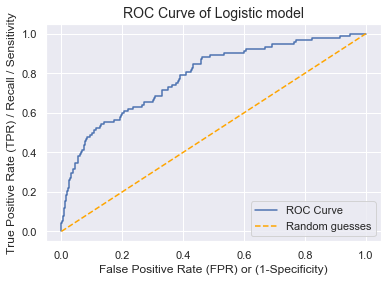

In [106]:
# Plotting the ROC curve

plt.plot(fpr, tpr, label='ROC Curve')

plt.ylabel('True Positive Rate (TPR) / Recall / Sensitivity')
plt.xlabel('False Positive Rate (FPR) or (1-Specificity)')
plt.title('ROC Curve of Logistic model', size=14)

# plot diagonal that illustrates model that randomly guesses
plt.plot([0,1],[0,1], linestyle='--', color='orange', label='Random guesses')

plt.legend(loc='lower right')
plt.show()

In [78]:
roc_auc_score(y_test, y_pred_proba[:,1])

0.782570888468809

---

In [67]:
# See variable selection from Datacamp logistic regression








# Rough

In [85]:
churn_data['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64